In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
os.chdir('..')

In [3]:
pd.options.display.max_columns = None

In [4]:
%%time

articles_df = pd.read_csv('data/articles.csv', dtype={'article_id': str})  # Make sure article_id is being loading in as a string
print(articles_df.shape)

customers_df = pd.read_csv('data/customers.csv')
print(customers_df.shape)

sample_submission_df = pd.read_csv('data/sample_submission.csv')
print(sample_submission_df.shape)

transactions_train_df = pd.read_csv('data/transactions_train.csv', dtype={'article_id': str})  # Make sure article_id is being loading in as a string
print(transactions_train_df.shape)

(105542, 25)
(1371980, 7)
(1371980, 2)
(31788324, 5)
CPU times: user 30.5 s, sys: 9.16 s, total: 39.7 s
Wall time: 43.5 s


In [5]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
sample_submission_df.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [8]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


### Random recommendations submission

In [25]:
articles_df.shape[0], articles_df['article_id'].nunique()

(105542, 105542)

In [26]:
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [27]:
n_customers = sample_submission_df.shape[0]
n_customers

1371980

In [28]:
np.random.seed(3)
predictions = np.random.choice(articles_df['article_id'].unique(), size=(n_customers, 12))
predictions

array([['0764285002', '0750260003', '0787716001', ..., '0816506001',
        '0868399001', '0678553003'],
       ['0605842008', '0697564057', '0938624001', ..., '0586362001',
        '0458925003', '0734196001'],
       ['0886800001', '0753692018', '0845610001', ..., '0768205003',
        '0485751003', '0627572011'],
       ...,
       ['0568415001', '0745293018', '0551174005', ..., '0567874006',
        '0521508001', '0565320023'],
       ['0824497001', '0795338003', '0679854018', ..., '0861133001',
        '0713997065', '0556436001'],
       ['0484644001', '0453765005', '0739612001', ..., '0573547001',
        '0882893001', '0903590001']], dtype=object)

In [29]:
random_submission = pd.DataFrame(predictions)
random_submission['customer_id'] = sample_submission_df['customer_id']
random_submission.head()

,0,1,2,3,4,5,6,7,8,9,10,11,customer_id
0,0764285002,0750260003,0787716001,0721884001,0690936023,0846356002,0926266001,0612510001,0546733001,0816506001,0868399001,0678553003,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
1,0605842008,0697564057,0938624001,0736767003,0743400001,0725358005,0740415001,0749562003,0766503001,0586362001,0458925003,0734196001,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
2,0886800001,0753692018,0845610001,0699063001,0519975008,0794205001,0757674002,0747720009,0608069008,0768205003,0485751003,0627572011,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
3,0766595005,0874224005,0689139002,0910177001,0784280001,0633150010,0787260004,0516777001,0600753001,0685814063,0589808001,0768858001,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...
4,0565935002,0497225005,0637538003,0708740017,0743642004,0708443002,0772448004,0828855002,0810710005,0526841003,0774543005,0575839001,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...


In [30]:
random_submission['prediction'] = random_submission[list(range(12))].agg(' '.join, axis=1)

In [31]:
random_submission.drop(columns=list(range(12)), inplace=True)

In [32]:
random_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0764285002 0750260003 0787716001 0721884001 06...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0605842008 0697564057 0938624001 0736767003 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0886800001 0753692018 0845610001 0699063001 05...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0766595005 0874224005 0689139002 0910177001 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0565935002 0497225005 0637538003 0708740017 07...


In [33]:
random_submission['prediction'][0]

'0764285002 0750260003 0787716001 0721884001 0690936023 0846356002 0926266001 0612510001 0546733001 0816506001 0868399001 0678553003'

In [34]:
random_submission.to_csv('submissions/20220226-random-rec.csv', index=False)

Scored 0! :)

### 12 most popular prediction

In [35]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2.0


In [40]:
top_12 = transactions_train_df.groupby('article_id')['customer_id'].count().sort_values(ascending=False).head(12).index.values
top_12

array(['0706016001', '0706016002', '0372860001', '0610776002',
       '0759871002', '0464297007', '0372860002', '0399223001',
       '0610776001', '0720125001', '0562245001', '0351484002'],
      dtype=object)

In [37]:
sample_submission_df['prediction'].unique()

array(['0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001'],
      dtype=object)

In [41]:
top_12

array(['0706016001', '0706016002', '0372860001', '0610776002',
       '0759871002', '0464297007', '0372860002', '0399223001',
       '0610776001', '0720125001', '0562245001', '0351484002'],
      dtype=object)

In [43]:
top_12_pred = ' '.join(top_12)
top_12_pred

'0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0399223001 0610776001 0720125001 0562245001 0351484002'

In [45]:
top_12_submission = sample_submission_df.copy()[['customer_id']]
top_12_submission['prediction'] = top_12_pred

In [47]:
top_12_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [48]:
top_12_submission.to_csv('submissions/20220227-top-12.csv', index=False)

Scored 0.0027 (rank 699/781). Top score is currently 0.0313

### Exploration

In [9]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [10]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        object 
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ GB


In [11]:
transactions_train_df['t_dat'] = pd.to_datetime(transactions_train_df['t_dat'])

What period were the transactions made in?

In [12]:
transactions_train_df['t_dat'].describe()

/var/folders/y7/s4mqr2gn1xs617jmcj6fc_ph0000gn/T/ipykernel_76022/385947481.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_train_df['t_dat'].describe()


count                31788324
unique                    734
top       2019-09-28 00:00:00
freq                   198622
first     2018-09-20 00:00:00
last      2020-09-22 00:00:00
Name: t_dat, dtype: object

Number of purchases by each customer over the period

In [13]:
%%time
purchases_per_customer = transactions_train_df.groupby('customer_id')['article_id'].count().values

CPU times: user 10 s, sys: 424 ms, total: 10.4 s
Wall time: 10.5 s


In [14]:
purchases_per_customer.mean(), purchases_per_customer.min(), purchases_per_customer.max()

(23.334630667241193, 1, 1895)

Total purchases per week

In [15]:
transactions_train_df['t_dat_week'] = transactions_train_df['t_dat'].dt.isocalendar().week
transactions_train_df['t_dat_year'] = transactions_train_df['t_dat'].dt.isocalendar().year

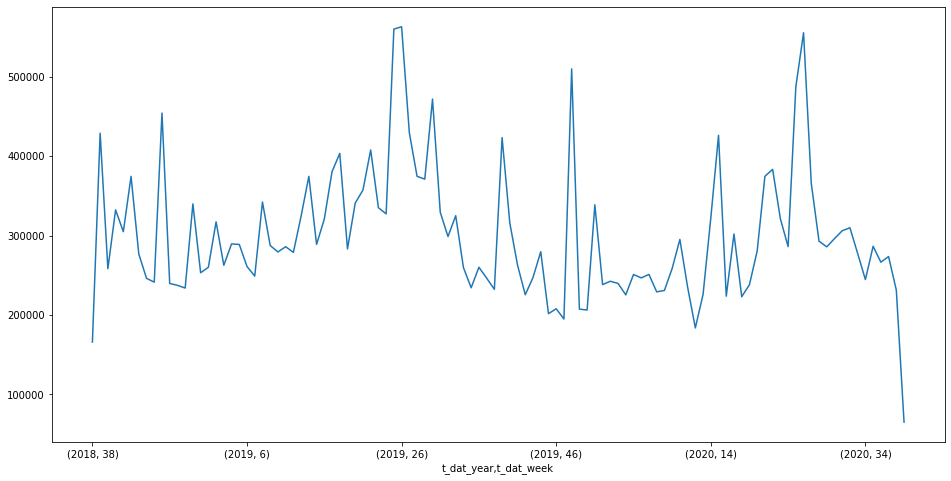

In [16]:
plt.figure(figsize=(16, 8))
transactions_train_df.groupby(['t_dat_year', 't_dat_week'])['customer_id'].count().plot()
plt.show()

Most common purchases

In [17]:
top_10 = transactions_train_df.groupby('article_id')['customer_id'].count().sort_values(ascending=False).head(10)
top_10

article_id
0706016001    50287
0706016002    35043
0372860001    31718
0610776002    30199
0759871002    26329
0464297007    25025
0372860002    24458
0610776001    22451
0399223001    22236
0706016003    21241
Name: customer_id, dtype: int64

In [18]:
articles_df[articles_df['article_id'].isin(top_10.index)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1713,0372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
1714,0372860002,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,White,3,Light,9,White,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
2236,0399223001,399223,Curvy Jeggings HW Ankle,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1772,Denim Trousers,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."
3711,0464297007,464297,Greta Thong Mynta Low 3p,286,Underwear bottom,Underwear,1010014,Placement print,9,Black,4,Dark,5,Black,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...
24836,0610776001,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
24837,0610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
53892,0706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53893,0706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,3,Light,2,Blue,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53894,0706016003,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,73,Dark Blue,2,Medium Dusty,2,Blue,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
70221,0759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,3936,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."


How many customers which we are predicting for are already in the training data?

In [19]:
transactions_train_df['customer_id'].nunique()

1362281

In [20]:
sample_submission_df['customer_id'].nunique()

1371980

In [21]:
# Number in submission set but not in training
len(
    set(sample_submission_df['customer_id'].unique()) - 
    set(transactions_train_df['customer_id'].unique())
)

9699

In [22]:
9699 / 1371980

0.0070693450341841714

In [64]:
# Number in training set but not in submission
len(
    set(transactions_train_df['customer_id'].unique()) - 
    set(sample_submission_df['customer_id'].unique())
)

1

In [15]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [14]:
# Do we have customer features for everyone in the sample dataset
len(
    set(sample_submission_df['customer_id'].unique()) - 
    set(customers_df['customer_id'].unique())
)

0

Yes